In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
np.random.seed(777)

In [0]:
x_data = np.array([[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5],
          [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]])
y_data = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]])

# Evaluation our model using this test dataset
x_test = np.array([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])

In [5]:
model = Sequential()
model.add(Dense(16, input_dim=3))
model.add(Dense(3,activation='softmax'))

model.summary()

#sgd = SGD(lr=0.01)
#sgd = SGD(lr=1.0)
sgd = SGD(lr=1e-5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_data, y_data, epochs=500)

W0723 10:40:44.333588 140207954622336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8 samples
Epoch 1/500
8/8 [==============================] - 0s 9ms/sample - loss: 3.3032 - accuracy: 0.2500
Epoch 2/500
8/8 [==============================] - 0s 696us/sample - loss: 3.3024 - accuracy: 0.2500
Epoch 3/500
8/8 [==============================] - 0s 524us/sample - loss: 3.3015 - accuracy: 0.2500
Epoch 4/500
8/8 [==============================] - 0s 464us/sample - loss: 3.3007 - accuracy: 0.2500
Epoch 5/500
8/8 [==============================] - 0s 543us/sample - loss: 3.2998 - accuracy: 0.2500
Epoch 6/500
8/8 [==============================] - 0s 451us/sample - loss: 3.2990 - accuracy: 0.2500
Epoch 7/500
8/8 [==============================] - 0s 511us/sample - loss: 3.2981 - accuracy: 0.2500
Epoch 8/500
8/8 [==============================] - 0s 274us/sample - loss: 3.2972 - accuracy: 0.2500
Epoch 9/500
8/8 [==============================] - 0s 433us/sample - loss: 3.2964 - accuracy: 0.2500
Epoch 10/500
8/8 [==============================] - 0s 262us/sample - loss

In [7]:
predictions = model.predict(x_test)
score = model.evaluate(x_test, y_test)

print('Prediction: ', [np.argmax(prediction) for prediction in predictions])
print('Accuracy: ', score[1])

3/3 [==============================] - 0s 5ms/sample - loss: 4.1352 - accuracy: 0.0000e+00
Prediction:  [1, 0, 0]
Accuracy:  0.0


dict_keys(['loss', 'accuracy'])


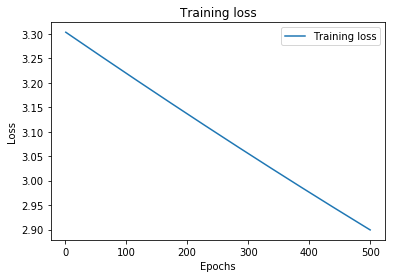

In [8]:
history_dict = history.history
print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

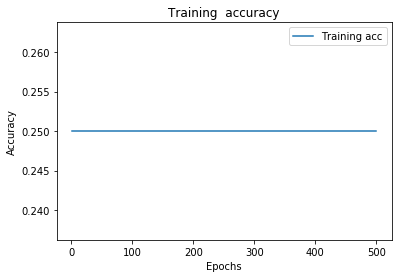

In [9]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()